# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3] # width, height of raw image

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Text(0.5,0,'Class ID')

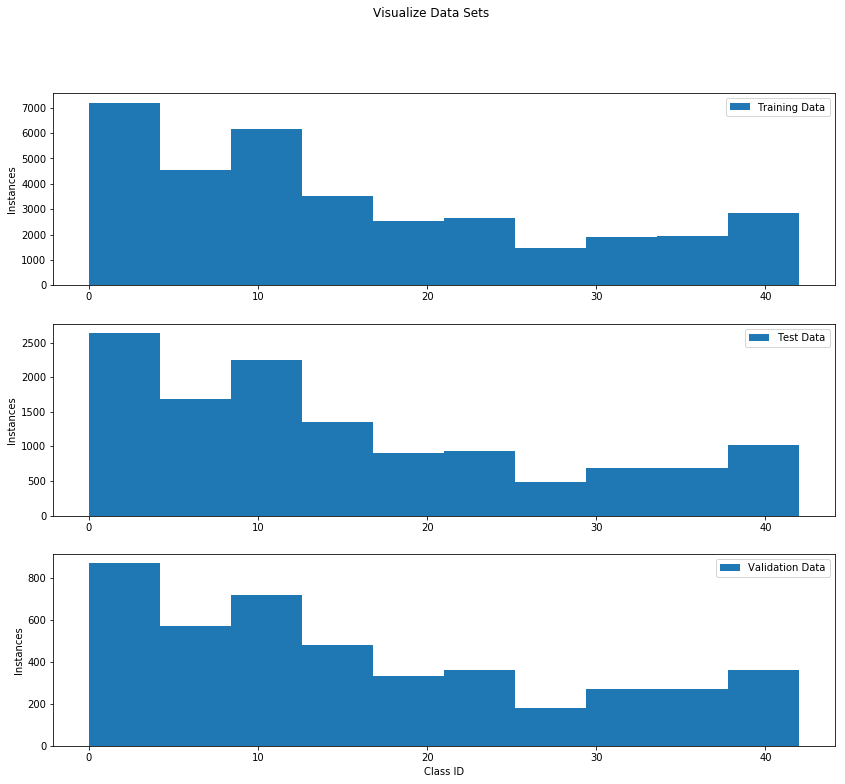

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# visualize distribution of classes among each data set, make histogram of training, valid and test set
#plot all sets of data in histograms and number of types
plt.figure(1, figsize=(14, 12))
plt.suptitle('Visualize Data Sets')
plt.subplot(311)
plt.hist(y_train,label='Training Data')
plt.legend()
plt.ylabel('Instances')
plt.subplot(312)
plt.hist(y_test,label='Test Data')
plt.legend()
plt.ylabel('Instances')
plt.subplot(313)
plt.hist(y_valid,label='Validation Data')
plt.legend()
plt.ylabel('Instances')
plt.xlabel('Class ID')
# Show image of random index of traffic sign
# import random
# index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()
# plt.figure(figsize=(1,1))
# plt.imshow(image, cmap="gray")

# TODO Add 5 examples of images for class for visualization


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
# Data augmentation test for flip
# Not very helpful

# import cv2

# def flip_data(X_data,Y_data):
#     data_size, height, width, channels = X_train.shape
#     num_oper = 1;
#     data_aug = np.zeros((data_size*(num_oper+1), height, width, channels))
#     data_aug_2 = np.zeros(data_size*(num_oper+1))
#     #print(data_aug.shape)
#     #print(data_aug)                
#     data_aug[:data_size] = X_data
#     data_aug_2[:data_size] = Y_data
    
#     for j in range(1,num_oper+1):
#         for i in range(0,data_size):
#             if j == 1:
#                 data_aug[j*data_size+i] = cv2.flip(X_data[i].squeeze(),0) # horizontal flip
#             if j == 2:
#                 data_aug[j*data_size+i] = cv2.flip(X_data[i].squeeze(),1) # vertical flip
#             if j == 3:
#                 data_aug[j*data_size+i] = cv2.flip(X_data[i].squeeze(),-1) # multiple flip
#     data_aug_2[(j-1)*data_size:j*data_size] = Y_data

#     return data_aug, data_aug_2

# X_train, y_train = flip_data(X_train, y_train)

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize(img): # normalize data around zero mean from -0.5, 0.5
    a = -0.5
    b = 0.5
    mi = 0
    ma = 255
    return a + ((img - mi) * (b - a)) / (ma - mi) 

def grayscale(img):
    # weighted gray scale formula
    gray  = np.dot(img[:,:,:3], [0.299, 0.587, 0.114])
    return gray[:,:,np.newaxis] # return 32x32x1 array

def process(images):
    img_array = []
    for img in images: # normalize and grayscale images
        img_array.append(normalize(grayscale(img)))
    return img_array

# process all images
X_train = process(X_train)
X_valid = process(X_valid)
X_test = process(X_test)

# Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm # 

#plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
#plt.show()
# gray = np.dot(X_train[0,:,:,:3], [0.299, 0.587, 0.114])
# #print(gray.shape)
# plt.figure(figsize=(1,1))
#plt.imshow(gray[0].squeeze(), cmap = 'gray')
#plt.show()
          
#from skimage import color

#print(gray[0].squeeze().shape)

#X_train = (X_train-128)/128
#X_valid = (X_valid-128)/128


In [9]:
#plt.imshow(X_train[1].squeeze())
#plt.imshow(X_train[1].squeeze(),cmap='gray')




### Model Architecture

In [1]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def filter_size(input_size,output_size,stride):
    return input_size-stride*output_size+1

def conv2d(x, mu, sigma, input_height, input_width, input_depth, output_depth, out_height, out_width, stride):
    # initialize filter heights and width
    filt_height = filter_size(input_height,out_height,stride) # calculate filter width, height for given output size
    filt_width = filter_size(input_width,out_width,stride)
 
    # sets filter weights and bias with zero mean and 0.1 sigma
    F_W = tf.Variable(tf.truncated_normal((filt_height,filt_width,input_depth,output_depth), mu, sigma))
    F_b = tf.Variable(tf.zeros(output_depth))

    # setup padding and stride for 2d linear convolution
    padding = 'VALID'
    strides = [1,stride,stride,1] # (batch,height,width,depth) set stride for each dimension
    # conv 2d
    return tf.nn.conv2d(x,F_W,strides,padding) + F_b

def pooling(conv_layer, input_height, input_width, out_height, out_width, stride):
    # max pool
    filt_height = filter_size(input_height,out_height,stride) # calculate filter width, height for given output size
    filt_width = filter_size(input_width,out_width,stride)
    ksize = [1, filt_height, filt_width, 1] # set to 1 to retain same dpeth
    # Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, stride, stride, 1] # set to 1 to retain same dpeth
    # set the padding, either 'VALID' or 'SAME'.
    padding = 'VALID'
    return tf.nn.max_pool(conv_layer, ksize, strides, padding)
def fullyConnect(layer, mu, sigma, input_size,output_size):
    F_W = tf.Variable(tf.truncated_normal((input_size,output_size), mu, sigma))
    F_b = tf.Variable(tf.zeros(output_size))
    return tf.matmul(layer,F_W) + F_b
    
def LeNet(x):
    batch_size, input_height, input_width, input_depth = (1,32,32,1)#3)
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # DONE: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x36.
    # Resize input and setup linear filter to create depth filter using formula
    out_height, out_width, stride, output_depth = (28,28,1,36) 
    conv_layer = conv2d(x, mu, sigma, input_height, input_width, input_depth, output_depth, out_height, out_width, stride) # run 2d conv layer function
    # verified right shape 1x28x28x36
    # DONE: Activation.
    # run through relu activation function
    conv_layer = tf.nn.relu(conv_layer)
    # DONE: Pooling. Input = 28x28x36. Output = 14x14x36.
    # output height/width to input height/width    
    input_height, input_width = (out_height,out_width) 
    out_height, out_width = (14,14)
    pool_stride = 2
    conv_layer = pooling(conv_layer, input_height, input_width, out_height, out_width, pool_stride)    
    # TODO: Layer 2: Convolutional. Input 1x14x14x36 Output = 10x10x48.
    input_height, input_width, input_depth = (out_height, out_width, output_depth)  
    out_height, out_width, output_depth = (10,10,48)
    conv_layer = conv2d(conv_layer, mu, sigma, input_height, input_width, input_depth, output_depth, out_height, out_width, stride) # run 2d conv layer function
    # TODO: Activation.
    # relu activation
    conv_layer = tf.nn.relu(conv_layer)
    # TODO: Pooling. Input = 10x10x48. Output = 5x5x48.
    input_height, input_width = (out_height, out_width) 
    out_height, out_width = (5,5)
    conv_layer = pooling(conv_layer, input_height, input_width, out_height, out_width, pool_stride) 
    # TODO: Flatten. Input = 5x5x48. Output = 1200.
    # flatten function by resizing into 1200x1 array / similar to squeeze
    conv_layer = flatten(conv_layer)
    # TODO: Layer 3: Fully Connected. Input = 1200. Output = 120.
    input_size = 1200
    output_size = 120
    conv_layer = fullyConnect(conv_layer,mu,sigma,input_size,output_size)
    # TODO: Activation.
    # RELU activation
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    input_size, output_size = (120, 84)
    conv_layer = fullyConnect(conv_layer,mu,sigma,input_size,output_size)    
    
    # TODO: Activation.
    # RELU activation
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    input_size, output_size = (84, 43)
    conv_layer = fullyConnect(conv_layer,mu,sigma,input_size,output_size)  

    return conv_layer

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [2]:
# Initialization
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline Code

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [3]:
# Model Evaluation Code
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
# Train the Model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.805

EPOCH 2 ...
Validation Accuracy = 0.877

EPOCH 3 ...
Validation Accuracy = 0.899

EPOCH 4 ...
Validation Accuracy = 0.894

EPOCH 5 ...
Validation Accuracy = 0.920

EPOCH 6 ...
Validation Accuracy = 0.909

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.927

EPOCH 10 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.929

EPOCH 13 ...
Validation Accuracy = 0.931

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.921

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.910

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.947

EPOCH 22 ...
Validation Accuracy = 0.909

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [8]:
import pandas as pd

def readSignNames():
    return pd.read_csv('./signnames.csv').values

signNames = readSignNames()


In [9]:
#print(signNames)

### Load and Output the Images

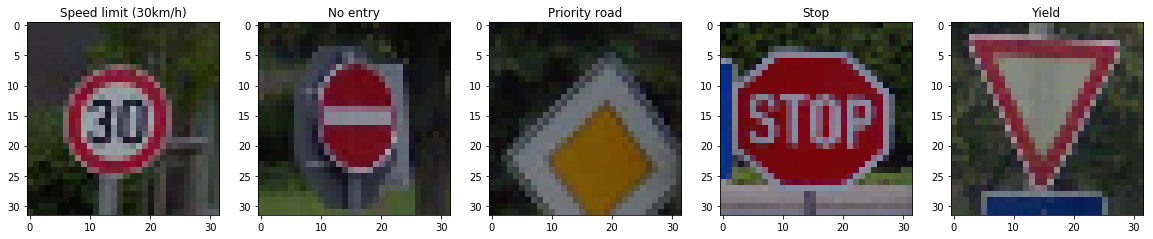

In [10]:
# load images
import cv2
import glob
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
file_list = glob.glob("test_new/*.jpg")

sign_type = [] 
internet_signs = []
labels = []

for file in file_list:
       # get matching file name with signName
    filename = file.split('/')[1].split('.')[0]
    # check file name match with sign Name    
    for sign in signNames:     
            if filename in sign[1]: 
                sign_type.append(sign[1])
                labels.append(sign[0])
    img =  cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    # resize img to 32x32
    resize_img = cv2.resize(img, (32, 32)) 
    internet_signs.append(resize_img)

# plot resized images 

def plot_images(images,sign_type,color=None):
    fig = plt.figure(figsize = (20,5))
    for i in range(0,len(images)):
        axis = fig.add_subplot(1, len(images), i+1) 
        
        axis.set_title(sign_type[i])
        if color == 'gray': 
            img = images[i].squeeze() 
        else:
            img = images[i]
        axis.imshow(img,cmap=color)
        
plot_images(internet_signs,sign_type)        

In [11]:
def normalize(img): # normalize data around zero mean from -0.5, 0.5
    a = -0.5
    b = 0.5
    mi = 0
    ma = 255
    return a + ((img - mi) * (b - a)) / (ma - mi) 

def grayscale(img):
    # weighted gray scale formula
    gray  = np.dot(img[:,:,:3], [0.299, 0.587, 0.114])
    return gray[:,:,np.newaxis] # return 32x32x1 array

def process(images):
    img_array = []
    for img in images: # normalize and grayscale images
        img_array.append(normalize(grayscale(img)))
    return img_array

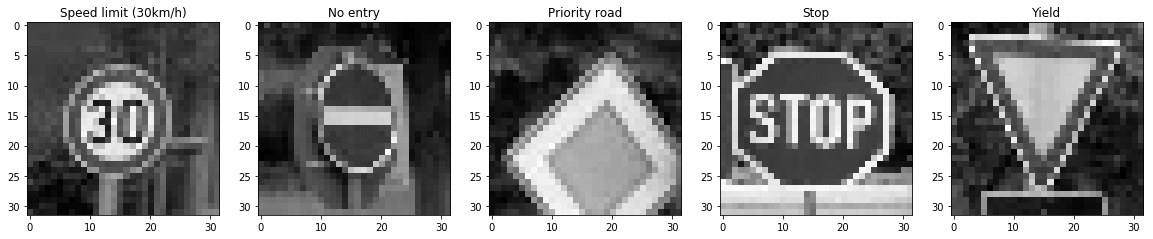

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np

proc_internet_signs = process(internet_signs) 
plot_images(proc_internet_signs,sign_type,'gray') 

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE = 128

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(proc_internet_signs, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [5] rhs shape= [43]
	 [[Node: save_1/Assign_27 = Assign[T=DT_FLOAT, _class=["loc:@Variable_9"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9, save_1/RestoreV2_27)]]

Caused by op 'save_1/Assign_27', defined at:
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-01fb10aa8943>", line 8, in <module>
    saver = tf.train.Saver()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 373, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 130, in restore
    self.op.get_shape().is_fully_defined())
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/albertzheng/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [5] rhs shape= [43]
	 [[Node: save_1/Assign_27 = Assign[T=DT_FLOAT, _class=["loc:@Variable_9"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_9, save_1/RestoreV2_27)]]


In [10]:
#print(labels)

[1, 17, 12, 14, 13]


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")